In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
# sequential model, for linear stack of NN layers

from keras.layers import Dense, Dropout, Activation, Flatten
# Dense is a standard densely connected NN layer
# Dropout randomly drops a percentage, p, of the neurons from a layer (helps reduce overfitting)

from keras.layers import Conv2D, MaxPooling2D
# Convolution layers that help efficiently train image data

from keras.utils import np_utils
# used for transforming data

Using TensorFlow backend.


In [27]:
# read training and testing data
X_train = pd.read_pickle("./training_data/X_train.bz2").values
Y_train = pd.read_pickle("./training_data/Y_train.bz2").values
X_test = pd.read_pickle("./training_data/X_test.bz2").values
Y_test = pd.read_pickle("./training_data/Y_test.bz2").values

p = np.shape(X_train)[0] # number of training data
q = np.shape(X_test)[0] # number of test data

m = np.shape(X_train)[1]/2 # number of (T,cv) data
n = np.shape(Y_train)[1] # dimension of output vector

X_train = np.reshape(X_train, (p, 2, m, 1))
X_test = np.reshape(X_test, (q, 2, m, 1))

In [3]:
print X_train.shape
print Y_train.shape
(m,n)

(60000, 2, 128, 1)
(60000, 128)


(128, 128)

[41022 54746 16990 17930 13981]


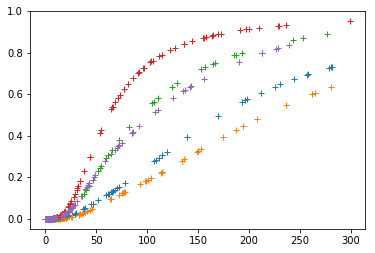

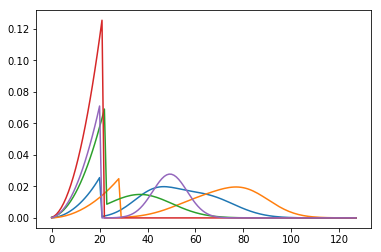

In [4]:
# check the loaded data
r = np.random.randint(0,p,5)
print r
for i in r:
    plt.figure(0)
    plt.plot(X_train[i][0],X_train[i][1],'+')
    plt.figure(1)
    plt.plot(Y_train[i])

In [5]:
# preprocess input data

# cv lies in the range [0,1], whereas T is in the range [0.1,300]
# we should feature scale T by dividing by 300 (typical maximum value for real data)

X_train[:,0,:,0] /= 300.
X_test[:,0,:,0] /= 300.
# normalize so values range between 0 and 1



[  259 36612 49857 18000 46937]


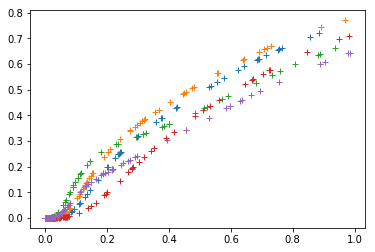

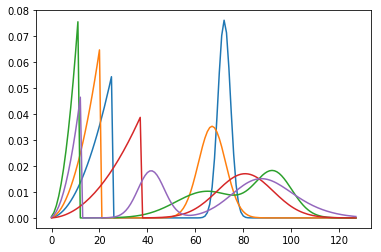

In [6]:
# check the processed data
r = np.random.randint(0,p,5)
print r
for i in r:
    plt.figure(0)
    plt.plot(X_train[i][0],X_train[i][1],'+')
    plt.figure(1)
    plt.plot(Y_train[i])

In [7]:
print X_train[0].shape

(2, 128, 1)


In [8]:
# here we define the model architecture
model = Sequential()

#input layer
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(2, 128, 1)))
print model.output_shape

model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Dropout(0.25))
print model.output_shape

model.add(Flatten())
print model.output_shape

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
print model.output_shape

model.add(Dense(n, activation='softmax'))
print model.output_shape

(None, 1, 127, 32)
(None, 1, 42, 32)
(None, 1344)
(None, 128)
(None, 128)


In [9]:
#-----------------------------------------------------------------------------
# Define custom loss functions for regression in Keras 
#-----------------------------------------------------------------------------
#
# REF: https://github.com/keras-team/keras/issues/7947

# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [10]:
# here we compile the model and define a loss function
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', rmse, r_square])

In [11]:
# now we can fit the model
result = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
60000/60000 [==============================] - 17s 281us/step - loss: 1.0359e-04 - mean_squared_error: 1.0359e-04 - rmse: 0.0091 - r_square: 0.4477
Epoch 2/100
60000/60000 [==============================] - 16s 270us/step - loss: 7.6725e-05 - mean_squared_error: 7.6725e-05 - rmse: 0.0079 - r_square: 0.5909
Epoch 3/100
60000/60000 [==============================] - 17s 285us/step - loss: 7.0119e-05 - mean_squared_error: 7.0119e-05 - rmse: 0.0076 - r_square: 0.6258
Epoch 4/100
60000/60000 [==============================] - 17s 283us/step - loss: 6.6453e-05 - mean_squared_error: 6.6453e-05 - rmse: 0.0074 - r_square: 0.6456
Epoch 5/100
60000/60000 [==============================] - 17s 288us/step - loss: 6.4142e-05 - mean_squared_error: 6.4142e-05 - rmse: 0.0072 - r_square: 0.6585
Epoch 6/100
60000/60000 [==============================] - 17s 275us/step - loss: 6.2310e-05 - mean_squared_error: 6.2310e-05 - rmse: 0.0072 - r_square: 0.6675
Epoch 7/100
60000/60000 [===============

60000/60000 [==============================] - 15s 255us/step - loss: 5.2346e-05 - mean_squared_error: 5.2346e-05 - rmse: 0.0066 - r_square: 0.7204
Epoch 52/100
60000/60000 [==============================] - 16s 261us/step - loss: 5.2488e-05 - mean_squared_error: 5.2488e-05 - rmse: 0.0066 - r_square: 0.7192
Epoch 53/100
60000/60000 [==============================] - 16s 259us/step - loss: 5.2340e-05 - mean_squared_error: 5.2340e-05 - rmse: 0.0066 - r_square: 0.7203
Epoch 54/100
60000/60000 [==============================] - 16s 259us/step - loss: 5.2553e-05 - mean_squared_error: 5.2553e-05 - rmse: 0.0066 - r_square: 0.7189
Epoch 55/100
60000/60000 [==============================] - 15s 257us/step - loss: 5.2362e-05 - mean_squared_error: 5.2362e-05 - rmse: 0.0066 - r_square: 0.7200
Epoch 56/100
60000/60000 [==============================] - 16s 262us/step - loss: 5.2225e-05 - mean_squared_error: 5.2225e-05 - rmse: 0.0066 - r_square: 0.7207
Epoch 57/100
60000/60000 [=====================

In [13]:
# get predictions
y_pred = model.predict(X_test)

In [26]:
Y_test.shape

(10000, 256)

9621


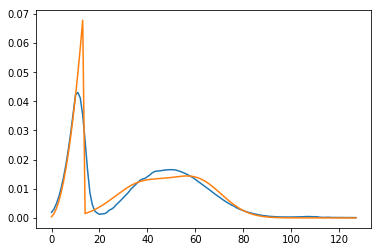

In [46]:
i = np.random.randint(0,q)
print i
plt.plot(y_pred[i])
plt.plot(Y_test[i])